## ssh -t -t seb300@o2.hms.harvard.edu -L 8886:localhost:8886 ssh $NODE_ID -L 8886:localhost:8886

In [1]:
import pandas as pd
import json
import os

data = {}
name = {}
for path, directories, files in os.walk('.'):
    if "_trial_learnability" in path:
        for file in files:
            if "json" in file:
                grid = path.split("_")[-4]
                ghost = "_".join(path.split("_")[-3:-1])
                if grid not in data:
                    data[grid] = {}
                    name[grid] = {}
                if ghost not in data[grid]:
                    data[grid][ghost] = []
                    name[grid][ghost] = []
                with open(os.path.join(path, file)) as f:
                    print(f"reading filename {os.path.join(path, file)}\n")
                    data[grid][ghost].append(json.load(f))
                    name[grid][ghost].append("_".join(path.split("_")[-2:]))


reading filename ./_trial_learnability_BoltzmannAgent_v2_RandomGhost_{"index":1,"prob":{}}_{"mean":0,"std":0.1}/saved_agent_BoltzmannAgent_v2_RandomGhost_{"index":1,"prob":{}}_{"mean":0,"std":0.1}_1-3866-17:11:2023-18:59:18-train0_training_agent.json

reading filename ./_trial_learnability_BoltzmannAgent_v2_DirectionalGhost_{"index":1,"prob":0.6}_{"mean":0,"std":0.1}/saved_agent_BoltzmannAgent_v2_DirectionalGhost_{"index":1,"prob":0.6}_{"mean":0,"std":0.1}_1-3459-17:11:2023-19:06:23-train0_training_agent.json

reading filename ./_trial_learnability_BoltzmannAgent_v2_DirectionalGhost_{"index":1,"prob":0.3}_{"mean":0,"std":0}/saved_agent_BoltzmannAgent_v2_DirectionalGhost_{"index":1,"prob":0.3}_{"mean":0,"std":0}_1-26893-17:11:2023-19:18:04-train0_training_agent.json

reading filename ./_trial_learnability_BoltzmannAgent_v3_DirectionalGhost_{"index":1,"prob":0.6}_{"mean":0,"std":0.1}/saved_agent_BoltzmannAgent_v3_DirectionalGhost_{"index":1,"prob":0.6}_{"mean":0,"std":0.1}_1-12238-17:11:

In [2]:
grid=list(data.keys())[1]
ghost=list(data[grid].keys())[1]
nois_df = pd.DataFrame(data[grid][ghost], index=name[grid][ghost])

In [3]:
color_maps=['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd']

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import plotly
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns

In [5]:
cmp = 'algae'
def correlation_heatmap(y_cols, x_cols, full_data):
    '''
    Uses scipy.stats.spearmanr function
    Params:
    y_cols, x_cols: sets of column titles (strings)
    full_data: pandas dataframe that includes all columns listed in y_cols, x_cols
    Returns:
    corr: Spearman correlation coefficient matrix (y_cols = rows, x_cols = cols of matrix)
    fig_corr: annotated plotly heatmap of coefficients
    p: Spearman p-value matrix
    fig_p: annotated plotly heatmap of p-values
    '''
    cols = y_cols+x_cols
    all_correlations = scipy.stats.spearmanr(full_data[cols], nan_policy='omit')
    corr = all_correlations.statistic[:len(y_cols), -len(x_cols):]
    corr = pd.DataFrame(corr)
    corr.columns = x_cols
    corr.index = y_cols

    p = all_correlations.pvalue[:len(y_cols), -len(x_cols):]
    p = pd.DataFrame(p)
    p.columns = x_cols
    p.index = y_cols
    
    fig_corr = px.imshow(corr, text_auto=True, aspect='auto', color_continuous_scale='agsunset')
    fig_r2 = px.imshow(corr**2, text_auto=True, aspect='auto', color_continuous_scale='agsunset')
    fig_p = px.imshow(p, text_auto=True, aspect='auto', color_continuous_scale='gray_r')

    return corr, fig_corr, p, fig_p, fig_r2

In [6]:
def correlation(df_final):
    corr, fig_corr, p, fig_p, fig_r2 = correlation_heatmap(col_1, col_2, df_final)
    fig_corr.show()
    fig_p.show()
    fig_r2.show()
    return corr, fig_corr, p, fig_p, fig_r2

In [7]:
grid=list(data.keys())[1]
ghost=list(data[grid].keys())[0]
action_pd_no_noise = pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
action_pd_no_noise.columns = action_pd_no_noise.columns.droplevel()
action_pd_noise = pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0.1}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
action_pd_noise.columns = action_pd_noise.columns.droplevel()

In [8]:
action_pd_noise.shape, action_pd_no_noise.shape

((4, 468), (4, 365))

exploring grid: v2 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


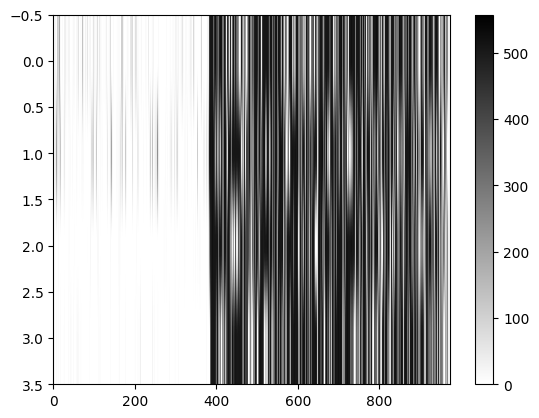

exploring grid: v2 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


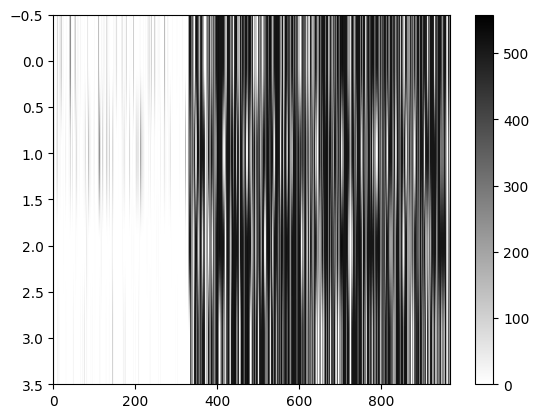

exploring grid: v2 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


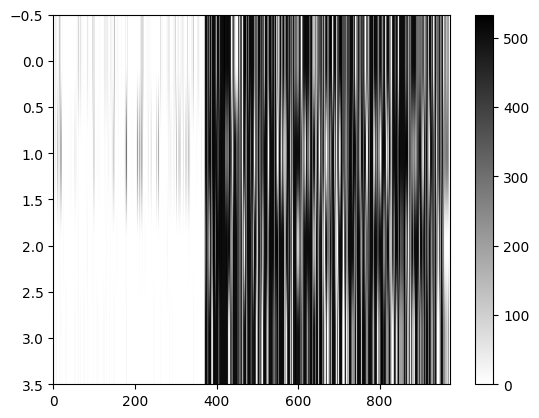

exploring grid: v3 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


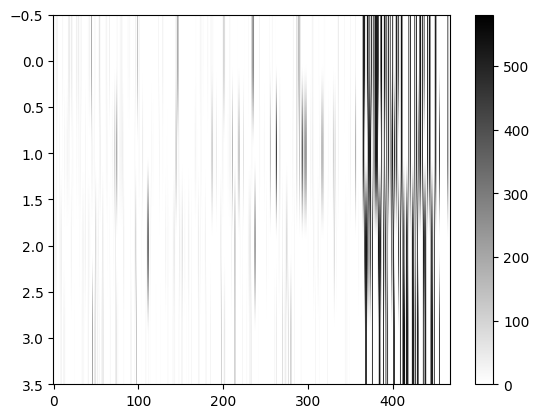

exploring grid: v3 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


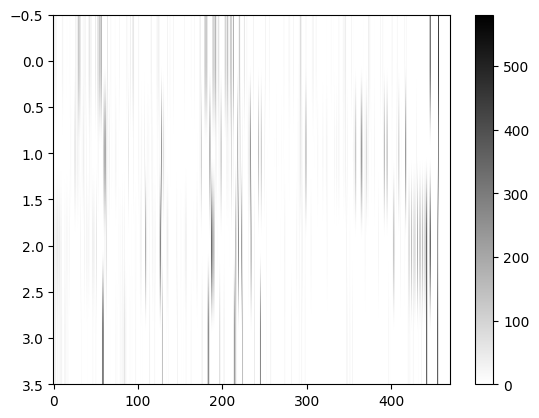

exploring grid: v3 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


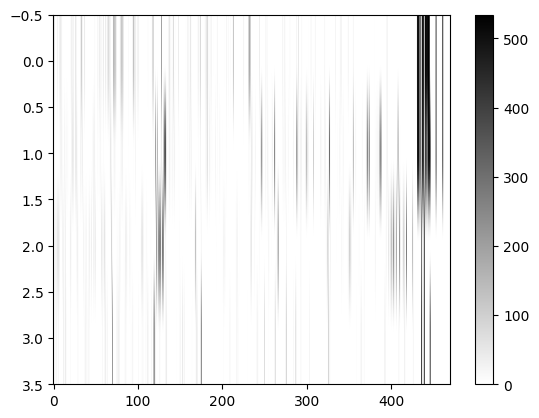

exploring grid: v4 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


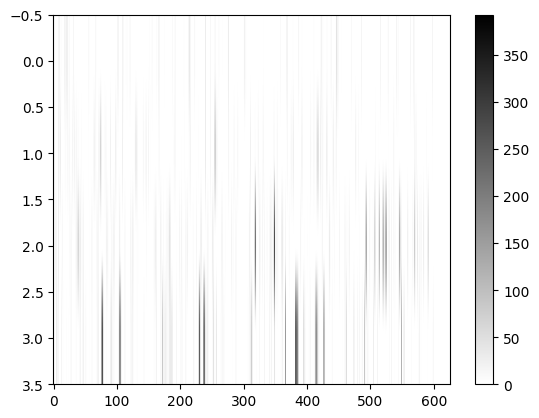

exploring grid: v4 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


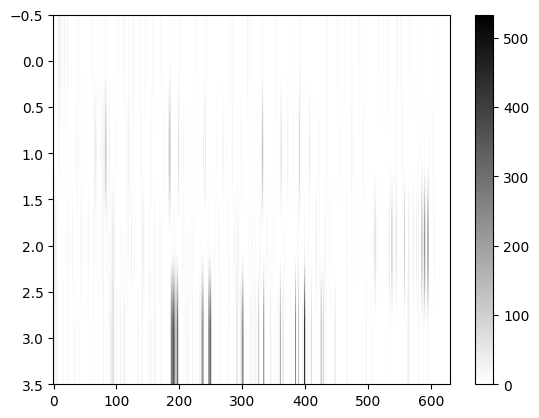

exploring grid: v4 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


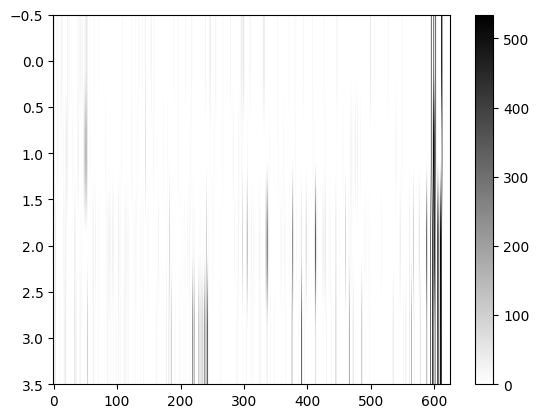

In [10]:
ax = plt.axes()
for grid in data.keys():
    for ghost in data[grid].keys():
        print(f"exploring grid: {grid} w/ ghost {ghost}, noise-no_noise")
        actions = len(pd.DataFrame(data[grid][ghost]).stack().apply(pd.Series).columns)
        action_pd_no_noise = pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
        action_pd_no_noise.columns = action_pd_no_noise.columns.droplevel()
        action_pd_noise = pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0.1}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
        action_pd_noise.columns = action_pd_noise.columns.droplevel()
        merge = pd.merge(action_pd_no_noise, action_pd_noise, how='outer')
        plt.imshow(abs(merge.iloc[:4,:].fillna(merge.max().max()).to_numpy() - merge.iloc[4:,:].fillna(merge.max().max()).to_numpy()), aspect="auto", cmap='binary') # I would add interpolation='none'
        plt.colorbar()
        plt.show()


In [12]:
actions = len(pd.DataFrame(data[grid][ghost]).stack().apply(pd.Series).columns)
action_pd_no_noise =pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
action_pd_no_noise.columns = action_pd_no_noise.columns.droplevel()
actions = len(pd.DataFrame(data[grid][ghost]).stack().apply(pd.Series).columns)

exploring grid: v2 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


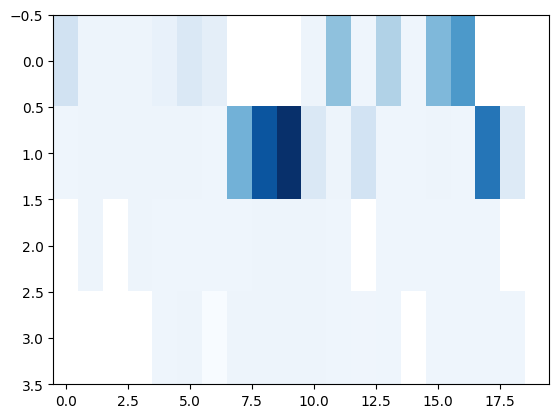

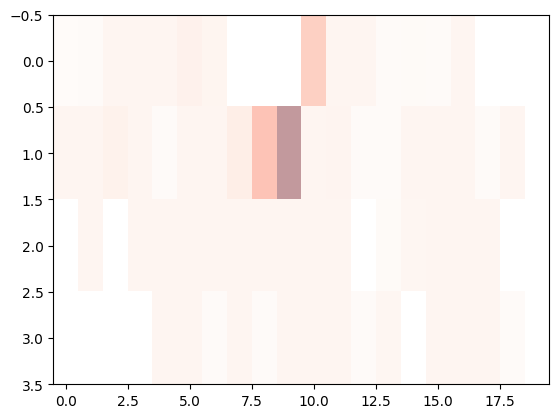

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



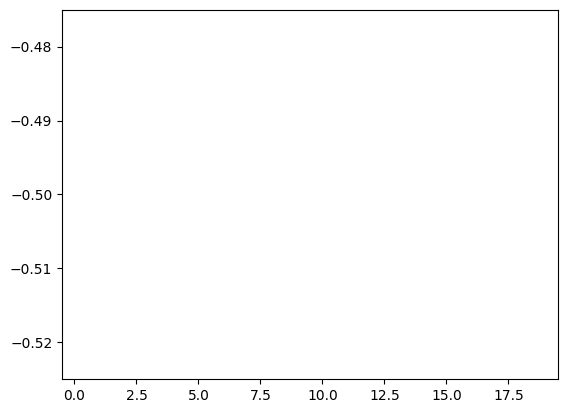

exploring grid: v2 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


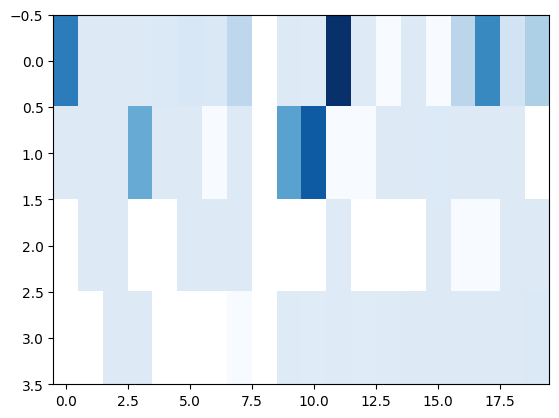

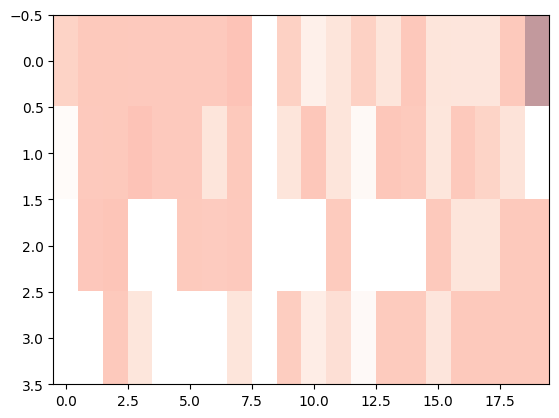

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



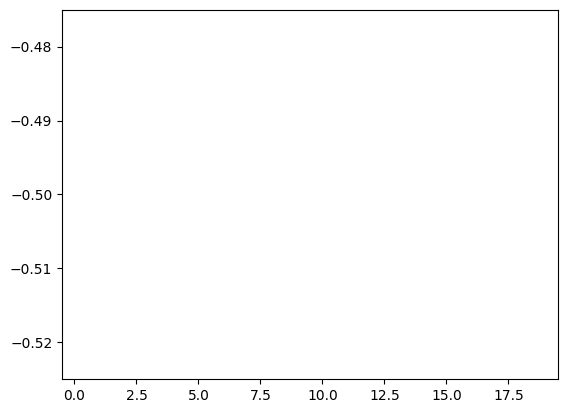

exploring grid: v2 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


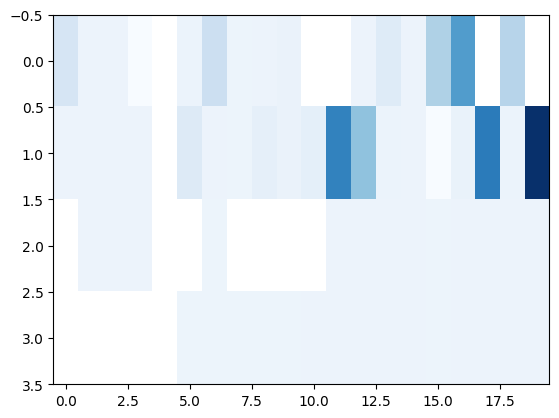

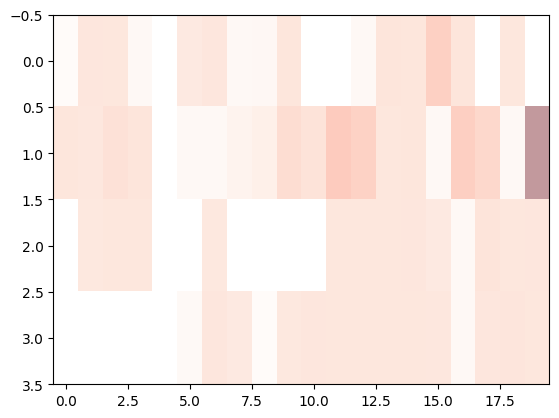

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



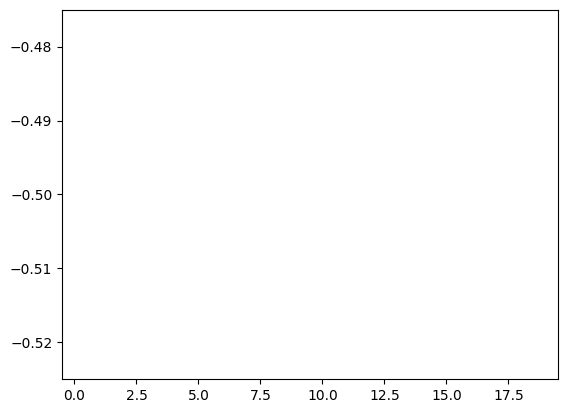

exploring grid: v3 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


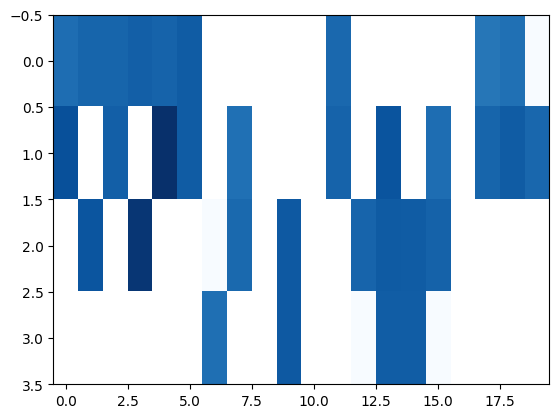

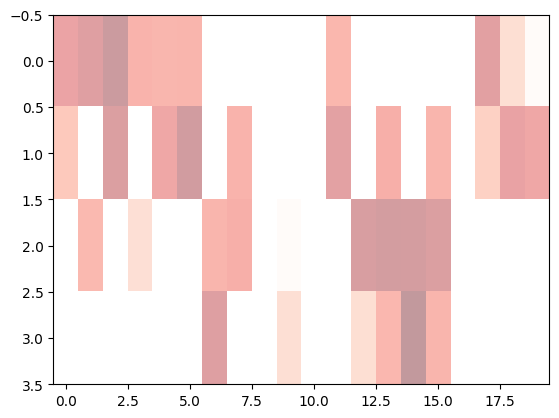

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



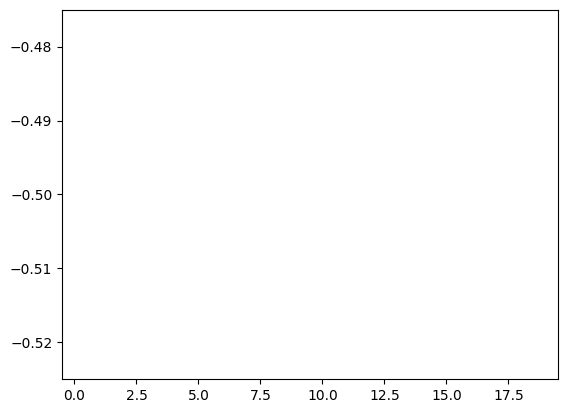

exploring grid: v3 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


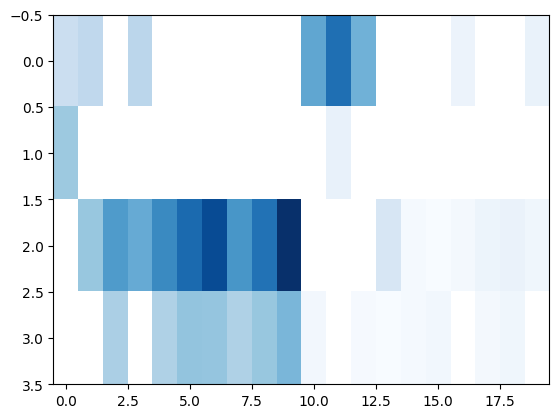

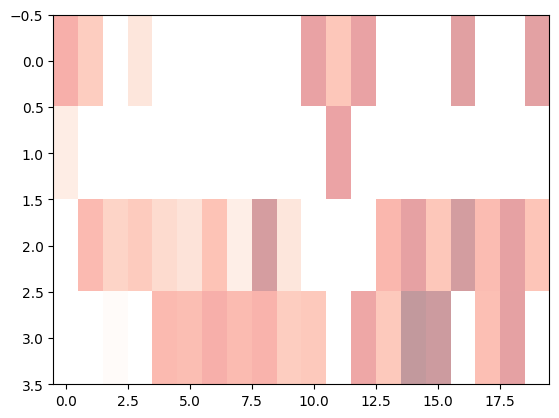

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



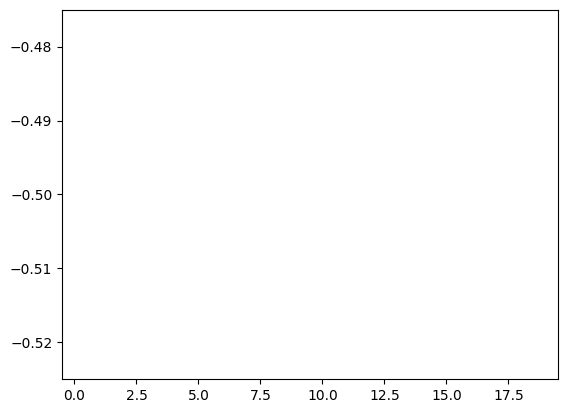

exploring grid: v3 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


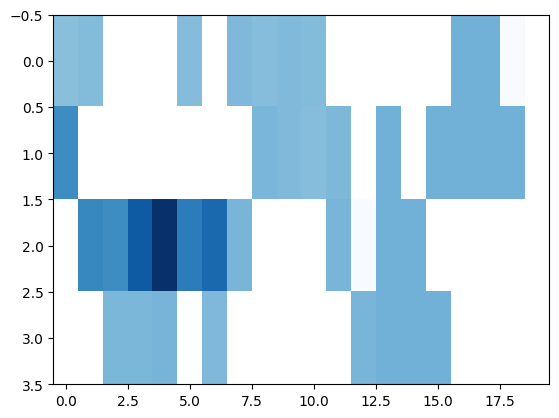

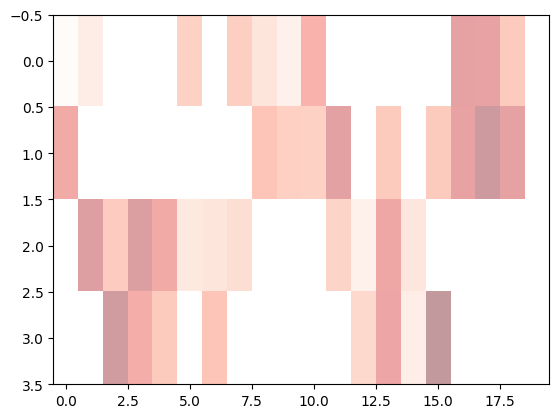

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



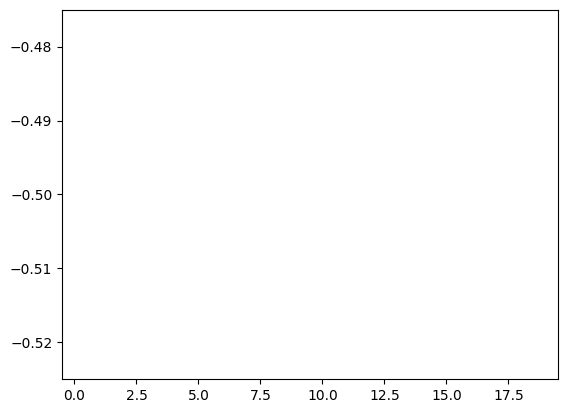

exploring grid: v4 w/ ghost DirectionalGhost_{"index":1,"prob":0.3}, noise-no_noise


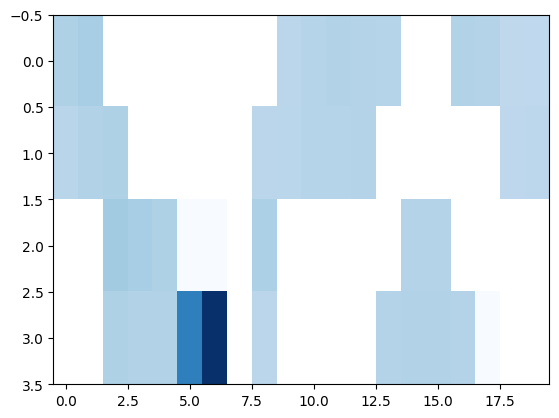

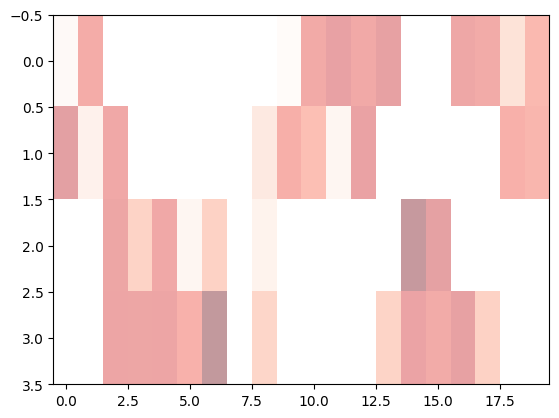

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



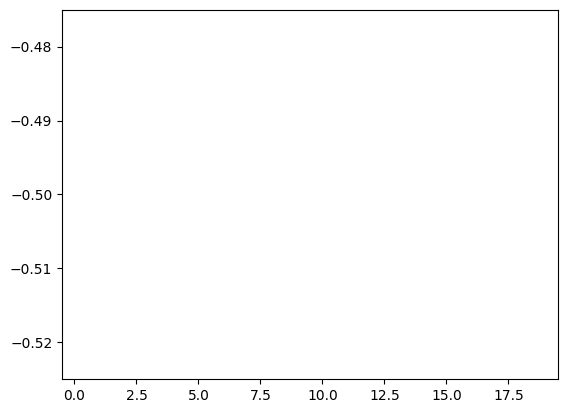

exploring grid: v4 w/ ghost RandomGhost_{"index":1,"prob":{}}, noise-no_noise


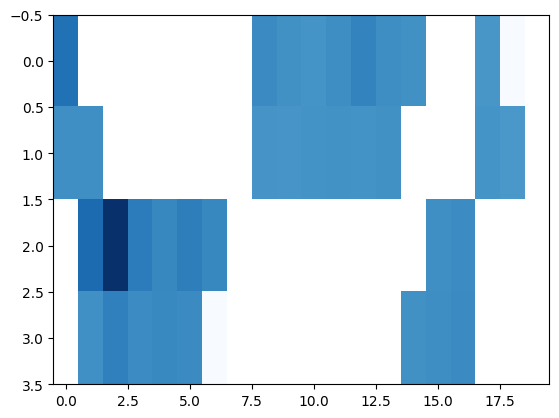

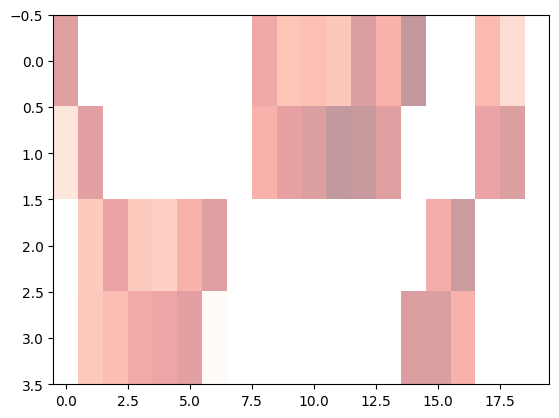

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



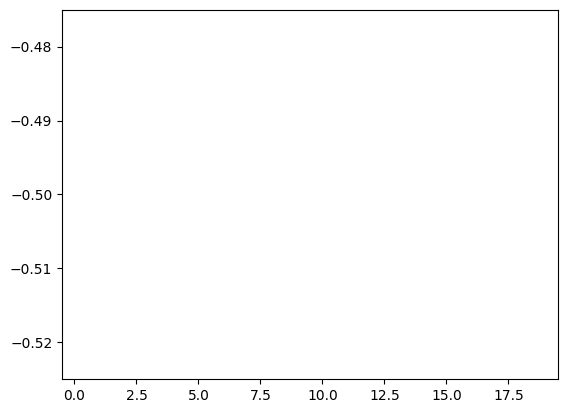

exploring grid: v4 w/ ghost DirectionalGhost_{"index":1,"prob":0.6}, noise-no_noise


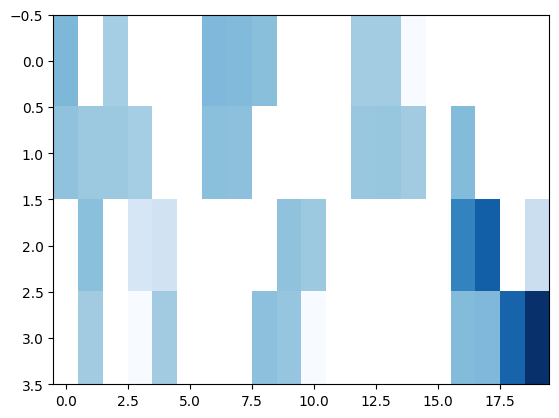

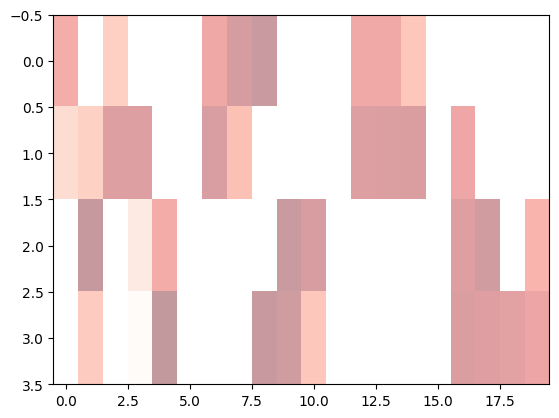

/tmp/ipykernel_25688/2415724376.py:17: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



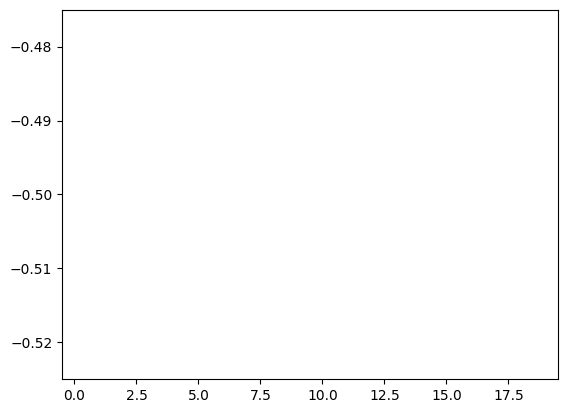

In [10]:
ax = plt.axes()
for grid in data.keys():
    for ghost in data[grid].keys():
        print(f"exploring grid: {grid} w/ ghost {ghost}, noise-no_noise")
        actions = len(pd.DataFrame(data[grid][ghost]).stack().apply(pd.Series).columns)
        action_pd_no_noise =pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
        action_pd_no_noise.columns = action_pd_no_noise.columns.droplevel()
        actions = len(pd.DataFrame(data[grid][ghost]).stack().apply(pd.Series).columns)
        action_pd_noise = pd.DataFrame(data[grid][ghost],index=name[grid][ghost]).T.filter(like='{"mean":0,"std":0.1}').T.stack().apply(pd.Series).T.iloc[["0","1","2","3"]]
        action_pd_noise.columns = action_pd_noise.columns.droplevel()
        merge = pd.merge(action_pd_no_noise, action_pd_noise, how='outer')
        plt.imshow(merge.iloc[:4,:20], aspect="auto", cmap='Blues',alpha=1, interpolation='none') # I would add interpolation='none'
        plt.show()
        plt.imshow(merge.iloc[4:,:20], aspect="auto", cmap='Reds', alpha=0.4, interpolation='none')
        plt.show()
        diff = pd.DataFrame(merge.iloc[:4,].to_numpy() - merge.iloc[4:,].to_numpy())
        plt.imshow(diff.iloc[4:,:20], aspect="auto", cmap='binary')
        plt.show()

TypeError: Image data of dtype object cannot be converted to float

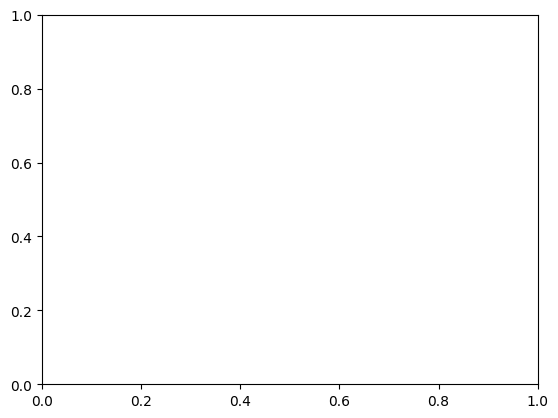

In [22]:
key='v2'
actions = len(pd.DataFrame(data[key]).stack().apply(pd.Series).columns)
action_pd_no_noise = pd.DataFrame(data[key]).stack().apply(pd.Series).xs(0, level=0).T.iloc[["0","1","2","3"]]
plt.imshow(action_pd_no_noise.iloc[:,:20], aspect="auto")

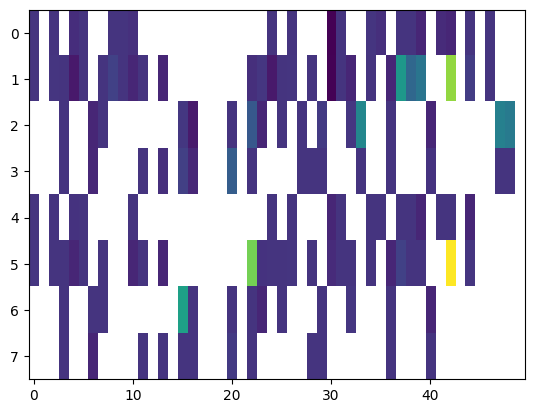

In [220]:
merge = pd.merge(action_pd_no_noise, action_pd_noise, how='outer')
plt.imshow(merge.iloc[:,-100:-50], aspect="auto")

In [187]:
for key in data:
    print(f"examining {key}")
    actions = len(pd.DataFrame(data[key]).stack().apply(pd.Series).columns)
    action_pd_noise = pd.DataFrame(data[key]).stack().apply(pd.Series).xs(1, level=0).T
    print(sum(sum(action_pd_noise.T[["0","1","2","3"]].T.isnull().to_numpy())))
    action_pd_no_noise = pd.DataFrame(data[key]).stack().apply(pd.Series).xs(0, level=0).T
    print(sum(sum(action_pd_no_noise.T[["0","1","2","3"]].T.isnull().to_numpy())))
    print(action_pd_noise.shape, action_pd_no_noise.shape)

examining v2
367
1086
(4, 331) (4, 969)
examining v3
821
1098
(4, 365) (4, 471)
examining v4


KeyError: 1

1086

(4, 331) (4, 969)


In [105]:
action_no_noise = pd.DataFrame(data["v2"]).stack().apply(pd.Series).xs(0, level=0).T
action_pd_noise = pd.DataFrame(data["v2"]).stack().apply(pd.Series).xs(1, level=0).T
merge_df = pd.merge(action_pd_no_noise, how="outer")
merge_df.head()

,%%%%%%%\n% P%\n%G .%\n% %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% P%\n%G %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% P %\n% G %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% P %\n% G %\n% %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% GP %\n% %\n% %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% G %\n% %\n% %\n% %\n%. %\n%%%%%%%,%%%%%%%\n%G P %\n% .%\n% %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% %\n% P %\n%G %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% %\n%GP %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% %\n%G %\n% %\n%. %\n%%%%%%%,...,%%%%%%%\n% %\n% P%\n% G %\n% %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% .%\n% G%\n%P %\n%. %\n%%%%%%%,%%%%%%%\n% %\n% .%\n% P %\n% %\n%. G%\n%%%%%%%,%%%%%%%\n% P%\n% .%\n% %\n% %\n% G %\n%%%%%%%,%%%%%%%\n% %\n%G %\n% %\n% %\n%P %\n%%%%%%%,%%%%%%%\n% P %\n% .%\n% %\n% %\n% G %\n%%%%%%%,%%%%%%%\n% %\n% G .%\n% %\n% %\n%P %\n%%%%%%%,%%%%%%%\n% G %\n% %\n% %\n% %\n%P %\n%%%%%%%,%%%%%%%\n% G P%\n% .%\n% %\n% %\n% %\n%%%%%%%,%%%%%%%\n% %\n% .%\n% %\n% P %\n% G%\n%%%%%%%
0,109.852707,-0.964177,122.001150,4.481890,2.185241,NaN,-0.050000,11.668361,1.731374,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.097500,71.961955,-0.444624,-0.771629,-25.050000,NaN,0.000000,-0.086758,-25.050000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-1.141752,-0.462592,NaN,NaN,NaN,NaN,-0.050000,-0.145463,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-0.458734,-0.766429,-0.778150,NaN,-0.050000,-0.088585,-0.050000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-47.193796,0.338720,2.269786,-0.310193,-0.838705,NaN,2.373999,0.000000,-0.050000,NaN,...,NaN,0.45,0.0,72.596125,NaN,-0.000714,NaN,NaN,0.0,0.0


In [70]:
col_1 = list(action_0_pd_noise.keys())
col_2 = []
corr, fig_corr, p, fig_p, fig_r2 = correlation(action_0_pd_noise)

TypeError: 'float' object is not subscriptable

In [ ]:
y_s = info_n_robert_base.iloc[:,1:22]
X = info_n_robert_base.iloc[:,22:]
col_1 = ['0_x']
col_2 = list(y_s.keys())
corr, fig_corr, p, fig_p, fig_r2 = correlation(corr_matrix_df)

In [ ]:
pd.DataFrame(data["v2"]).stack().apply(pd.Series).xs(1, level=0).T